# Problem Set V - 40313 Introduction to Probability

## Question 1

**a.** Find the 2-step transition probabilities.

**Solution.**

By definition, $\mathbf{P}^{(2)}=\mathbf{P}^2$. For $i=j$,
$$
p^{(2)}_{ii}=\sum_{k}p_{ik}p_{ki}
= p_{ij}p_{ji}+p_{i\ell}p_{\ell i}
= \tfrac12\cdot\tfrac12+\tfrac12\cdot\tfrac12=\tfrac12,
$$
where $\{j,\ell\}=S\setminus\{i\}$. For $i\neq j$,
$$
p^{(2)}_{ij}=\sum_{k}p_{ik}p_{kj}
= p_{ii}p_{ij}+p_{ij}p_{jj}+p_{i\ell}p_{\ell j}
= 0 + 0 + \tfrac12\cdot\tfrac12=\tfrac14.
$$
Hence
$$
\mathbf{P}^2=
\begin{bmatrix}
\tfrac12 & \tfrac14 & \tfrac14\\
\tfrac14 & \tfrac12 & \tfrac14\\
\tfrac14 & \tfrac14 & \tfrac12
\end{bmatrix}.
$$

**b.** Is the chain periodic?

**Solution.**

The period of state $i$ is $\gcd\{n\ge 1: p^{(n)}_{ii}>0\}$. Since $p^{(2)}_{11}>0$ and also $p^{(3)}_{11}>0$ (e.g., $1\to 2\to 3\to 1$ has positive probability), the set of return times contains $2$ and $3$, so $\gcd(2,3)=1$. Thus state $1$ has period $1$; by irreducibility (which we discuss more in detail in the next subquestion) all states share the same period, so the chain is *aperiodic*.

**c.** Is the chain irreducible?

**Solution.**

Yes. From each state we can reach any other state in one step (all off-diagonal entries of $\mathbf{P}$ are positive), so all states communicate; by the definition the chain is irreducible.

**d.** Find the stationary distribution.

**Solution.**

A stationary distribution $\pi$ satisfies $\pi \mathbf{P}=\pi$ and $\sum_i\pi_i=1$ (Ch. 4.5.2). Here $\mathbf{P}$ is doubly stochastic (row and column sums are $1$), hence the uniform vector is stationary:
$$
\pi=\left(\tfrac13,\tfrac13,\tfrac13\right).
$$
We can check this directly by observing that
$$
\left(\tfrac{1}{3},\tfrac{1}{3},\tfrac{1}{3}\right)
\begin{bmatrix}
0 & \tfrac12 & \tfrac12 \\
\tfrac12 & 0 & \tfrac12 \\
\tfrac12 & \tfrac12 & 0
\end{bmatrix}
= \left(\tfrac{1}{3},\tfrac{1}{3},\tfrac{1}{3}\right).
$$

**e.** If the chain starts in 1, is the chain stationary?

**Solution.**

No. “Stationary” for a time-homogeneous Markov chain means the initial law is a stationary distribution (so all marginal laws are constant over time). Starting in $1$ means the initial distribution is $\delta_1\neq \pi$, hence the process is *not* stationary.

**f.** Find $\lim_{n\rightarrow\infty}\mathbf{P}(X_n= 1)$ if the chain starts in 1.

**Solution.**

For finite, irreducible, aperiodic Markov chains, $P^n(i,\cdot)\to\pi(\cdot)$ as $n\to\infty$ (convergence to the unique stationary distribution). Thus
$$
\lim_{n\to\infty}\mathbf P(X_n=1\mid X_0=1)=\pi_1=\tfrac13.
$$



**g.** Would the answer to point f. change if the initial probabilities were different?

**Solution.**

No. By the same convergence result, for *any* initial distribution $\alpha$, we have $\alpha \mathbf{P}^n\to \pi$; in particular $\mathbf{P}(X_n=1)\to \pi_1=1/3$ regardless of the starting law.

## Question 2

**a.** Simulate in Matlab or in Python 1000 steps $(x_1,\dots,x_{1000})$ of a Markov chain with state space $S=\{1,2,3\}$, initial state $2$ and transition matrix 

$$
    \left[
    \begin{array}{ccc}
    0 &1/2 &1/2\\
    1/ 2 &0 &1/ 2\\
    1/ 2 &1/ 2& 0
    \end{array}
    \right].
$$

In [ ]:
import numpy as np

rng = np.random.default_rng(40313)

P = np.array([[0.0, 0.5, 0.5],
              [0.5, 0.0, 0.5],
              [0.5, 0.5, 0.0]], dtype=float)

n_steps = 1000
x = np.empty(n_steps, dtype=int)
x[0] = 2  # initial state

states = np.array([1, 2, 3], dtype=int)

for t in range(1, n_steps):
    i = x[t-1] - 1              # row index for current state
    x[t] = rng.choice(states, p=P[i])

print("First 10 states:", x[:10])

First 10 states: [2 3 2 3 1 2 3 2 1 2]


**b.** Find the 20-steps transition matrix.

In [ ]:
import numpy as np

P20 = np.linalg.matrix_power(P, 20)

np.set_printoptions(precision=8, suppress=True)
print("P^20 =\n", P20)

P^20 =
 [[0.33333397 0.33333302 0.33333302]
 [0.33333302 0.33333397 0.33333302]
 [0.33333302 0.33333302 0.33333397]]


**c.** Draw $x_1,\dots,x_{20}$.

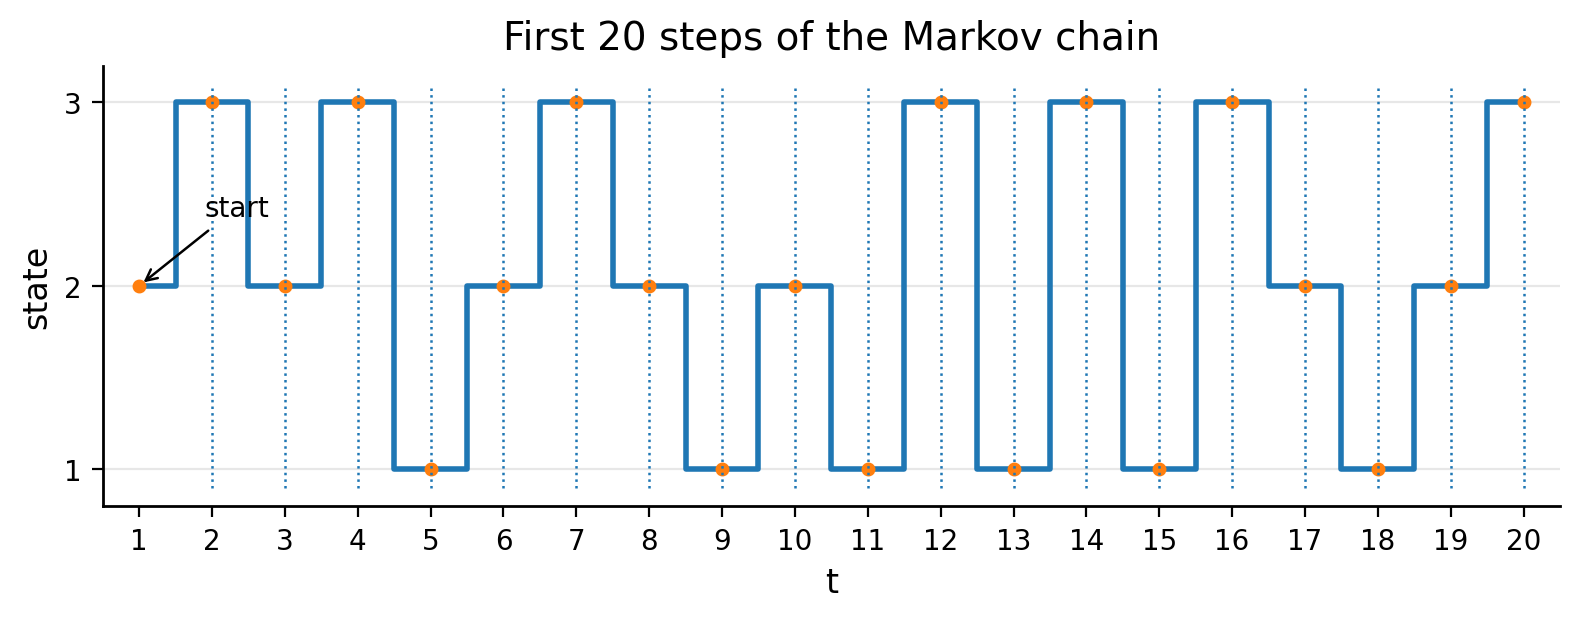

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- typographic + layout tweaks ----
plt.rcParams.update({
    "figure.figsize": (8, 3.2),   # wide, compact height
    "figure.dpi": 200,            # high-res
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

t = np.arange(1, 21)
y = x[:20]

fig, ax = plt.subplots()

# Main step line + discrete markers
ax.step(t, y, where="mid", linewidth=2)
ax.plot(t, y, linestyle="none", marker="o", markersize=4)

# Vertical dotted lines
jumps = np.where(np.diff(y) != 0)[0] + 1  # indices of change, in 1..19
if jumps.size:
    ax.vlines(t[jumps], ymin=0.9, ymax=3.1, linestyles=":", linewidth=0.9)

# Axes cosmetics
ax.set_xlim(0.5, 20.5)
ax.set_ylim(0.8, 3.2)
ax.set_yticks([1, 2, 3])
ax.set_xticks(np.arange(1, 21))
ax.set_xlabel("t")
ax.set_ylabel("state")
ax.set_title("First 20 steps of the Markov chain")

# Cleaner frame + ticks
for side in ("top", "right"):
    ax.spines[side].set_visible(False)
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)
ax.tick_params(axis="both", which="both", direction="out", length=4, width=0.8)

# Subtle horizontal gridlines for readability
ax.grid(True, axis="y", alpha=0.3)

# Annotate the starting point
ax.annotate("start",
            xy=(t[0], y[0]),
            xytext=(t[0] + 0.9, y[0] + 0.35),
            arrowprops=dict(arrowstyle="->", lw=0.9),
            ha="left", va="bottom")

fig.tight_layout()

plt.show()

**d.** Find the distribution of the last 100 observations.

In [5]:
import numpy as np

# Assumes x from part (a)
last_100 = x[-100:]
counts = np.bincount(last_100, minlength=4)[1:]  # ignore index 0
proportions = counts / counts.sum()

for s, c, p in zip([1, 2, 3], counts, proportions):
    print(f"State {s}: count = {c:3d}, proportion = {p:.4f}")

State 1: count =  35, proportion = 0.3500
State 2: count =  31, proportion = 0.3100
State 3: count =  34, proportion = 0.3400
